In [217]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import *

In [28]:
def plot_image(img):
    img = img.astype(np.uint8)
    img_new = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_new, cmap = 'gray')
#     plt.axis('off')

(3680, 5224, 3)


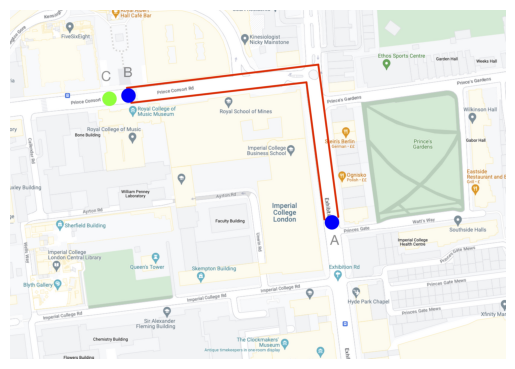

In [7]:
#read image
img = cv2.imread('CWMap.jpg', cv2.IMREAD_UNCHANGED)
print(img.shape)
fig, ax = plt.subplots()
plot_image(img)

In [296]:

def extract_color(color, plot = False):
    # Load the image
    img = cv2.imread('CWMap.jpg')

    # Convert the image to the HSV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    if color == 'red' or color == 'r':
        
        # Define a range of HSV values for the red color
        lower_red = np.array([0, 50, 50])
        upper_red = np.array([10, 255, 255])
        mask1 = cv2.inRange(hsv, lower_red, upper_red)

        lower_red = np.array([170, 50, 50])
        upper_red = np.array([180, 255, 255])
        mask2 = cv2.inRange(hsv, lower_red, upper_red)

        # Combine the masks
        red_extracted = cv2.bitwise_or(mask1, mask2)

        if plot == True:
            plot_image(red_extracted)
            plt.show()
        return red_extracted
    
    elif color == 'green' or color == 'g':
        # Define range of green color in HSV
        lower_green = (40, 50, 50)
        upper_green = (80, 255, 255)

        # Threshold the HSV image to get only green colors
        mask = cv2.inRange(hsv, lower_green, upper_green)

        # Apply bitwise AND operation to the original image
        # and the mask to extract green color
        green_extracted = cv2.bitwise_and(img, img, mask=mask)

        green_extracted[:,:,:][green_extracted[:,:,:]<250] = 0
        green_extracted[:,:,:][green_extracted[:,:,:]>250] = 255

        # BGR
        green_extracted = green_extracted[:,:,1]

        if plot == True:
            plot_image(green_extracted)
            plt.show()
        return green_extracted
    
    elif color == 'blue' or color == 'b':
        # Define range of blue color in HSV
        lower_blue = (100, 50, 50)
        upper_blue = (130, 255, 255)

        # Threshold the HSV image to get only blue colors
        mask = cv2.inRange(hsv, lower_blue, upper_blue)

        # Apply bitwise AND operation to the original image
        # and the mask to extract blue color
        blue_extracted = cv2.bitwise_and(img, img, mask=mask)

        blue_extracted[:,:,:][blue_extracted[:,:,:]<250] = 0
        blue_extracted[:,:,:][blue_extracted[:,:,:]>250] = 255

        # BGR
        blue_extracted = blue_extracted[:,:,0]
        
        if plot == True:
            plot_image(blue_extracted)
            plt.show()
        return blue_extracted


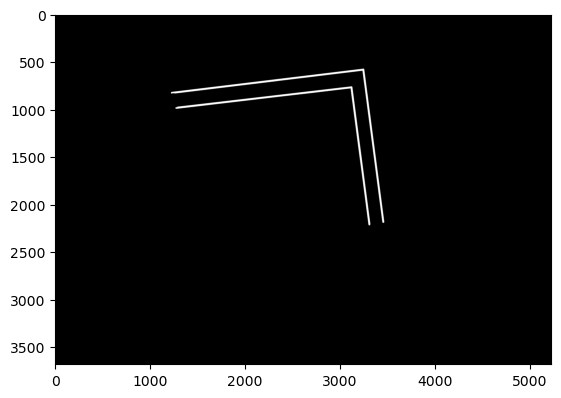

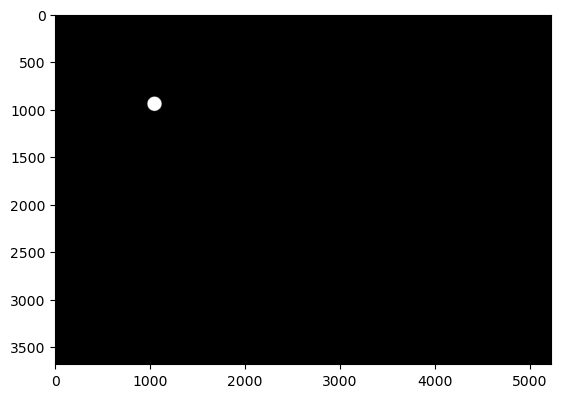

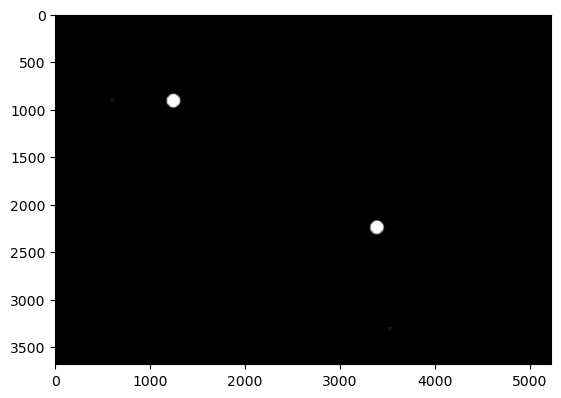

In [298]:
red_extracted = extract_color('r', True)
green_extracted = extract_color('g', True)
blue_extracted = extract_color('b', True)

In [338]:
def post_process_red(red_extracted):
    row_indices, col_indices = np.nonzero(red_extracted)

    # There an unexpected point appearing on the top left corner of the image, remove it

    num_to_be_removed = len(row_indices[row_indices<100])
    row_indices = row_indices[num_to_be_removed:]
    col_indices = col_indices[num_to_be_removed:]

    row_indices = height - row_indices
    
    return col_indices, row_indices

def post_process_green(green_extraced):
    row_indices, col_indices = np.nonzero(green_extracted)

    height, width = green_extracted.shape
    row_indices = height - row_indices
    
    return col_indices, row_indices, np.mean(col_indices), np.mean(row_indices)

def post_process_blue(blue_extracted):
    
    row_indices, col_indices = np.nonzero(blue_extracted)

    height, width = green_extracted.shape
    row_indices = height - row_indices

    row_indices_new = row_indices[(row_indices>500) & (col_indices>800)]
    col_indices_new = col_indices[(row_indices>500) & (col_indices>800)]

    row_indices_new[(row_indices_new<2650) & (col_indices_new<1500)] = 0
    col_indices_new[(row_indices_new<2650) & (col_indices_new<1500)] = 0
    
    end_point_y = np.mean(row_indices_new[:15500])
    end_point_x = np.mean(col_indices_new[:15500])

    start_point_y = np.mean(row_indices_new[15500:])
    start_point_x = np.mean(col_indices_new[15500:])
    
    return col_indices_new, row_indices_new, end_point_x, end_point_y, start_point_x, start_point_y
    

[0.0, 29.456550744965785, 58.91310148993157, 88.36965223489736]


(1000.0, 3500.0)

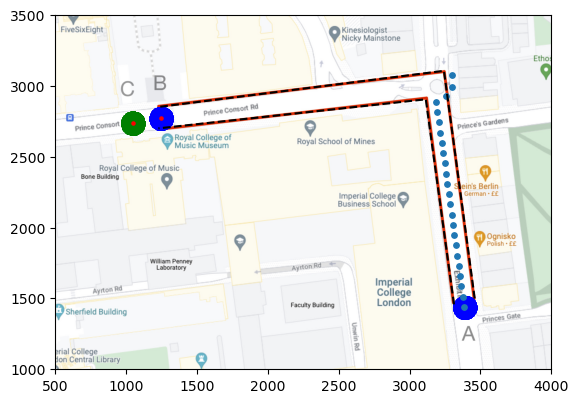

In [614]:
# Invert the raw image vertically
im = plt.imread("CWMap.jpg")[::-1]
im = plt.imshow(im)

# Plot green point
col_indices_g, row_indices_g, x_g, y_g = post_process_green(green_extracted)
plt.scatter(col_indices_g, row_indices_g, c='g', s=1)
plt.scatter(x_g,y_g, s=5, c='r')
plt.ylim([0, height])
plt.xlim([0, width])

# Plot blue point
col_indices_b, row_indices_b, end_point_x, end_point_y, start_point_x, start_point_y = post_process_blue(blue_extracted)
plt.scatter(col_indices_b, row_indices_b, c='b', s=1)
plt.scatter(end_point_x, end_point_y, s=5, c='r')
plt.scatter(start_point_x, start_point_y, s=5, c='r')

# Plot red line
col_indices_r, row_indices_r = post_process_red(red_extracted)

# col_indices becomes the x-value of the plot and row_indices becomes the y-value of the plot 
# plt.scatter(col_indices_r, row_indices_r, c='r', s=1)

height, width = red_extracted.shape

plt.ylim([0, height])
plt.xlim([0, width])

end_point_1 = [1228, 2700]
end_point_2 = [1220, 2850]
start_point_1 = [3314, 1458]
start_point_2 = [3460, 1500]
turn_point_1 = [3115, 2905]
turn_point_2 = [3243, 3106]

plt.plot([start_point_1[0], turn_point_1[0], end_point_1[0]],
        [start_point_1[1], turn_point_1[1], end_point_1[1]], c = 'black', linestyle='dashed')

plt.plot([start_point_2[0], turn_point_2[0], end_point_2[0]],
        [start_point_2[1], turn_point_2[1], end_point_2[1]], c = 'black', linestyle='dashed')

# Trip 1
x_distance_1 = turn_point_1[0] - start_point_1[0]
y_distance_1 = turn_point_1[1] - start_point_1[1]
grad_1 = y_distance_1/x_distance_1
distance_1 = np.sqrt(y_distance_1**2 + x_distance_1**2)

# Trip 2
grad_2 = (turn_point_1[1] - end_point_1[1])/(turn_point_1[0] - end_point_1[0])
angle = np.degrees(np.arctan(np.abs(grad_1 - grad_2)/np.abs(1+grad_1*grad_2)))

x_lst = [start_point_x]
y_lst = [start_point_y]
theta_lst = [np.arctan2(y_distance_1, x_distance_1)]

x_dot_lst, y_dot_lst, theta_dot_lst = [], [], []

# Assume t1 = 20s or 20 iterations
t1 = 20
for i in range(t1):
    x_dot = x_distance_1/t1
    y_dot = y_distance_1/t1
    
    x_dot_lst.append(x_dot)
    y_dot_lst.append(y_dot)
    theta_dot_lst.append(0)
    
    # distance = speed * time, in each iteration, time is 1s
    x_lst.append(x_lst[-1] + x_dot * 1)
    y_lst.append(y_lst[-1] + y_dot * 1)
    theta_lst.append(theta_lst[-1])
    
t2 = 3
theta = [0]
for j in range(t2):
    # Velocity of moving forward
    v = 80
    
    # Step of angle turning
    theta_dot = np.radians(angle/t2)
    theta.append(theta[-1] + theta_dot * 1)

    x_dot = v * np.cos(theta[-1])
    y_dot = v * np.sin(theta[-1])
    
    x_dot_lst.append(x_dot)
    y_dot_lst.append(y_dot)
    theta_dot_lst.append(theta_dot)
    
    # distance = speed * time, in each iteration, time is 1s
    x_lst.append(x_lst[-1] + x_dot * 1)
    y_lst.append(y_lst[-1] + y_dot * 1)
    theta_lst.append(theta_lst[-1] - theta[-1])
    
print([np.degrees(i) for i in theta])
# # Trip 3

# # From the end point to the last location after turning
# x_distance_3 = end_point_x - x_lst[-1]
# y_distance_3 = end_point_y - y_lst[-1]
    
# t3 = 25
# for i in range(t3):
#     x_dot = x_distance_3/t3
#     y_dot = y_distance_3/t3
    
#     x_dot_lst.append(x_dot)
#     y_dot_lst.append(y_dot)
#     theta_dot_lst.append(0)
    
#     # distance = speed * time, in each iteration, time is 1s
#     x_lst.append(x_lst[-1] + x_dot * 1)
#     y_lst.append(y_lst[-1] + y_dot * 1)
#     theta_lst.append(theta_lst[-1])
    
plt.scatter(x_lst,y_lst, s = 15) 
plt.xlim([500, 4000])
plt.ylim([1000, 3500])


In [607]:
97  np.array([np.degrees(i) for i in theta]) 

array([ 97.        , 126.45655074, 155.91310149, 185.36965223])

In [604]:
np.degrees(4.7921477046904135)

274.56983828206546

In [593]:
x_dot_lst[20], y_dot_lst[20], theta_dot_lst[20], theta_lst[20]
x_dot_lst[-1], y_dot_lst[-1], theta_dot_lst[-1], theta_lst[-1]

(-70.09529017395887, -9.227141925350715, 0, 4.7921477046904135)

In [237]:
alpha = {'RL': pi/2,
        'RR': -pi/2,
        'F': 0}

beta = {'RL': 0,
        'RR': pi,
        'F': symbols('f(t)')}

# Rear left 1 (fixed standard)
RL1 = Matrix([[sin(alpha['RL'] + beta['RL']), -cos(alpha['RL'] + beta['RL']), -symbols('W')/2*cos(beta['RL'])]])
display(RL1)

# Rear left 2 (fixed standard)
RL2 = Matrix([[cos(alpha['RL'] + beta['RL']), sin(alpha['RL'] + beta['RL']), symbols('W')/2*sin(beta['RL'])]])
display(RL2)

# Rear right 1 (fixed standard)
RR1 = Matrix([[sin(alpha['RR'] + beta['RR']), -cos(alpha['RR'] + beta['RR']), -symbols('W')/2*cos(beta['RR'])]])
display(RR1)

# Rear right 2 (fixed standard)
RR2 = Matrix([[cos(alpha['RR'] + beta['RR']), sin(alpha['RR'] + beta['RR']), symbols('W')/2*sin(beta['RR'])]])
display(RR2)

# Front 1 (steerable standard)
F1 = Matrix([[sin(alpha['F'] + beta['F']), -cos(alpha['F'] + beta['F']), -symbols('L')*cos(beta['F'])]])
display(F1)

# Front 2 (steerable standard)
F2 = Matrix([[cos(alpha['F'] + beta['F']), sin(alpha['F'] + beta['F']), symbols('L')*sin(beta['F'])]])
display(F2)

Matrix([[1, 0, -W/2]])

Matrix([[0, 1, 0]])

Matrix([[1, 0, W/2]])

Matrix([[0, 1, 0]])

Matrix([[sin(f(t)), -cos(f(t)), -L*cos(f(t))]])

Matrix([[cos(f(t)), sin(f(t)), L*sin(f(t))]])

In [595]:
# Forward kinematics 
# Rear right, rear left 1, rear left 2
M = Matrix([RR1, RL1, RL2])
display(M)

def forward_kinematics(M, phi_r, phi_l, theta):
    # Rotational speed of the wheels
    phi = Matrix([symbols('\dot{\phi_r}'), symbols('\dot{\phi_l}')])

    # Rotational matrix from 0 to I
    R_0I = Matrix([[cos(symbols('theta')), -sin(symbols('theta')), 0],
               [sin(symbols('theta')), cos(symbols('theta')), 0],
               [0, 0, 1]])

    r = Matrix([[symbols('r'),0], [0, symbols('r')], [0, 0]])

    display(R_0I)
    display(M**-1 * r * phi) # Check with slides
    PI = R_0I * M**-1 * r * phi
    
    result = PI.subs({'W': 4, 'r':1, '\dot{\phi_r}': phi_r, '\dot{\phi_l}': phi_l, 'theta': theta})
    
    # x_dot, y_dot, theta_dot
    return [float(result[0]), float(result[1]), float(result[2])]
    
# forward_kinematics(M, 73.03098657419328, 73.03098657419328, 1.7074649240077648)
forward_kinematics(M, 3.613023159942868, 3.613023159942868, 4.7921477046904135)

Matrix([
[1, 0,  W/2],
[1, 0, -W/2],
[0, 1,    0]])

Matrix([
[cos(theta), -sin(theta), 0],
[sin(theta),  cos(theta), 0],
[         0,           0, 1]])

Matrix([
[ \dot{\phi_l}*r/2 + \dot{\phi_r}*r/2],
[                                   0],
[-\dot{\phi_l}*r/W + \dot{\phi_r}*r/W]])

[0.2878646851267874, -3.6015372103228924, 0.0]

In [594]:
# Inverse kinematics (see Mobile robot slide 11)

def inverse_kinematics(M, x_dot, y_dot, theta_dot, theta):
    r = Matrix([[symbols('r'),0], [0, symbols('r')], [0, 0]])
    display(r)
    
    # Rotational matrix from 0 to I
    R_0I = Matrix([[cos(symbols('theta')), -sin(symbols('theta')), 0],
                   [sin(symbols('theta')), cos(symbols('theta')), 0],
                   [0, 0, 1]])
    
    # Rotational matrix from I to 0
    R_I0 = R_0I.T
    
    PI = Matrix([symbols('\dot{x}'), symbols('\dot{y}'), symbols('\dot{\\theta}')])
    wheel_vel = (r.T * r)**-1 * r.T * M * R_I0 * PI
    
    display((r.T * r)**-1)
    display(r.T * M)
    display((r.T * r)**-1 * r.T * M)
    display(R_I0)
    display(PI)
    
    result = wheel_vel.subs({'W': 4, 'r': 1, '\dot{x}': x_dot, '\dot{y}': y_dot, 
                             '\dot{\\theta}': theta_dot, 'theta': theta})
    # phi_right, and phi_left
    return [float(result[0]), float(result[1]), theta]

# inverse_kinematics(M, x_dot=1, y_dot=3, theta_dot=0, theta=0.3)


# inverse_kinematics(M, -9.95, 72.35, 0, 1.7074649240077648)
inverse_kinematics(M, -70.09529017395887, -9.227141925350715, 0, 4.7921477046904135)

Matrix([
[r, 0],
[0, r],
[0, 0]])

Matrix([
[r**(-2),       0],
[      0, r**(-2)]])

Matrix([
[r, 0,  W*r/2],
[r, 0, -W*r/2]])

Matrix([
[1/r, 0,  W/(2*r)],
[1/r, 0, -W/(2*r)]])

Matrix([
[ cos(theta), sin(theta), 0],
[-sin(theta), cos(theta), 0],
[          0,          0, 1]])

Matrix([
[     \dot{x}],
[     \dot{y}],
[\dot{\theta}]])

[3.613023159942868, 3.613023159942868, 4.7921477046904135]

In [566]:

phi_r = 1.8508566957869454
phi_l = 0.6508566957869455
theta = 0.3
# Rotational speed of the wheels
phi = Matrix([symbols('\dot{\phi_r}'), symbols('\dot{\phi_l}')])

# Rotational matrix from 0 to I
R_0I = Matrix([[cos(symbols('theta')), -sin(symbols('theta')), 0],
           [sin(symbols('theta')), cos(symbols('theta')), 0],
           [0, 0, 1]])

r = Matrix([[symbols('r'),0], [0, symbols('r')], [0, 0]])

display(R_0I)
display(M**-1 * r * phi) # Check with slides
PI = R_0I * (M**-1 * r * phi)
display(PI)
result = PI.subs({'W': 4, 'r':1, '\dot{\phi_r}': phi_r, '\dot{\phi_l}': phi_l, 'theta': theta})


result

Matrix([
[cos(theta), -sin(theta), 0],
[sin(theta),  cos(theta), 0],
[         0,           0, 1]])

Matrix([
[ \dot{\phi_l}*r/2 + \dot{\phi_r}*r/2],
[                                   0],
[-\dot{\phi_l}*r/W + \dot{\phi_r}*r/W]])

Matrix([
[(\dot{\phi_l}*r/2 + \dot{\phi_r}*r/2)*cos(theta)],
[(\dot{\phi_l}*r/2 + \dot{\phi_r}*r/2)*sin(theta)],
[            -\dot{\phi_l}*r/W + \dot{\phi_r}*r/W]])

Matrix([
[ 1.19498904415236],
[0.369653429242678],
[              0.3]])

In [527]:
symbols('\dot{\\theta}')

\dot{\theta}

In [525]:
# Matrix([symbols('x'), symbols('y'), symbols('\dot{\theta}')])
symbols('\dot{\phi_l}')

\dot{\phi_l}

In [554]:
A_subs = wheel_vel.subs({'\dot{x}': 1, '\dot{y}': 2, '\dot{\phi}': 0.2, 'W': 4, 'r':1, 'theta':0.3})
A_subs

Matrix([
[  0.764296075802927],
[-0.0357039241970731]])

## Backup Script

97.83053381227076

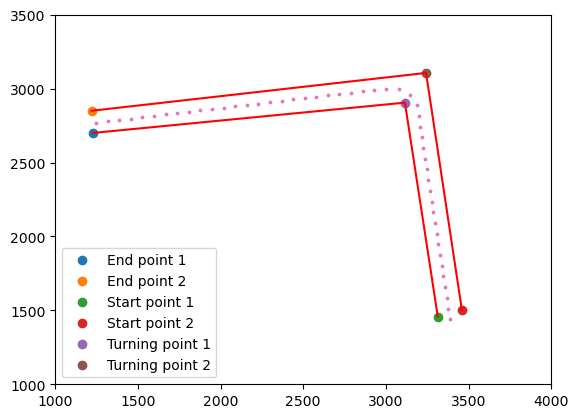

In [612]:
# Plot red line

col_indices_r, row_indices_r = post_process_red(red_extracted)

# col_indices becomes the x-value of the plot and row_indices becomes the y-value of the plot 
# plt.scatter(col_indices_r, row_indices_r, c='r', s=1)

end_point_1 = [1228, 2700]
end_point_2 = [1220, 2850]
start_point_1 = [3314, 1458]
start_point_2 = [3460, 1500]
turn_point_1 = [3115, 2905]
turn_point_2 = [3243, 3106]


plt.plot([start_point_1[0], turn_point_1[0], end_point_1[0]],
        [start_point_1[1], turn_point_1[1], end_point_1[1]], c = 'r')

plt.plot([start_point_2[0], turn_point_2[0], end_point_2[0]],
        [start_point_2[1], turn_point_2[1], end_point_2[1]], c = 'r')

plt.scatter(end_point_1[0], end_point_1[1], label = 'End point 1')
plt.scatter(end_point_2[0], end_point_2[1], label = 'End point 2')
plt.scatter(start_point_1[0], start_point_1[1], label = 'Start point 1')
plt.scatter(start_point_2[0], start_point_2[1], label = 'Start point 2')
plt.scatter(turn_point_1[0], turn_point_1[1], label = 'Turning point 1')
plt.scatter(turn_point_2[0], turn_point_2[1], label = 'Turning point 2')
plt.legend()

plt.xlim(1000, 4000)
plt.ylim(1000, 3500)

# Trip 1
grad_1 = (turn_point_1[1] - start_point_1[1])/(turn_point_1[0] - start_point_1[0])
x_distance_1 = turn_point_1[0] - start_point_1[0]
y_distance_1 = turn_point_1[1] - start_point_1[1]
distance_1 = np.sqrt(y_distance_1**2 + x_distance_1**2)

# Trip 2
grad_2 = (turn_point_1[1] - end_point_1[1])/(turn_point_1[0] - end_point_1[0])
angle = np.degrees(np.arctan(np.abs(grad_1 - grad_2)/np.abs(1+grad_1*grad_2)))


x = [start_point_x]
y = [start_point_y]

# Assume t1 = 20s or 20 iterations
t1 = 20
for i in range(t1):
    x_dot = x_distance_1/t1
    y_dot = y_distance_1/t1
    
    # distance = speed * time, in each iteration, time is 1s
    x.append(x[-1] + x_dot * 1)
    y.append(y[-1] + y_dot * 1)
    
t2 = 3
theta = [0]
for j in range(t2):
    # Velocity of moving forward
    v = 80
    
    # Step of angle turning
    theta_step = - np.radians(angle/t2)
    theta.append(theta[-1]+theta_step)
    y_dot = v * np.cos(theta[-1])
    x_dot = v * np.sin(theta[-1])
    # distance = speed * time, in each iteration, time is 1s
    x.append(x[-1] + x_dot * 1)
    y.append(y[-1] + y_dot * 1)
    

# Trip 3

# From the end point to the last location after turning
x_distance_3 = end_point_x - x[-1]
y_distance_3 = end_point_y - y[-1]
    
t3 = 25
for i in range(t3):
    x_dot = x_distance_3/t3
    y_dot = y_distance_3/t3
    
    # distance = speed * time, in each iteration, time is 1s
    x.append(x[-1] + x_dot * 1)
    y.append(y[-1] + y_dot * 1)
    
plt.scatter(x,y, s = 3) 

theta_lst = [np.arctan2(y_distance_1, x_distance_1)]

np.degrees(theta_lst[0])

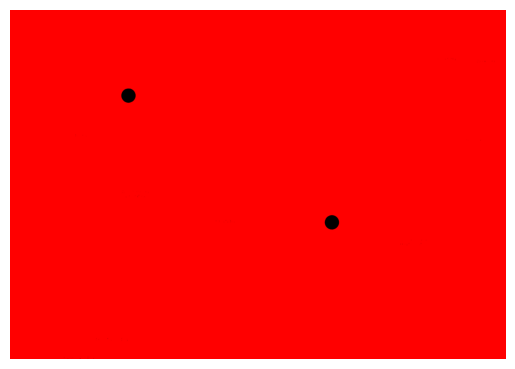

In [39]:
img = cv2.imread('CWMap.jpg')

red_img = img.copy()
# BGR
red_img[:,:,0]=0
red_img[:,:,1]=0

plot_image(red_img)

red_img[:,:,2][red_img[:,:,2]>10] = 255
red_img[:,:,2][red_img[:,:,2]<=10] = 0
plot_image(red_img)

(3680, 5224)


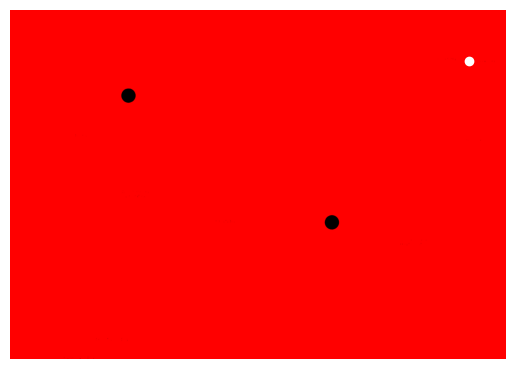

In [42]:
print(red_img[:,:,-1].shape)

coordinate = list(zip(*np.where(red_img[:,:,-1] == 0)))

end_point_lst, start_point_lst = [], []
for i, j in coordinate:
    if i < 800:
        end_point_lst.append([i,j])
    else:
        start_point_lst.append([i,j])
        

end_point_x = np.mean(np.array(end_point_lst)[:,1])
end_point_y = np.mean(np.array(end_point_lst)[:,0])

# # Make one pixel red
# # red_img[int(end_point_x)-10:int(end_point_x)+10, int(end_point_y)-10:int(end_point_y)+10]=[255,255,255]
# red_img[end_point_x, end_point_y]=[255,255,255]
plot_image(red_img)
plt.scatter(end_point_x, end_point_y, c='white')
plt.show()


# print(int(end_point_x), int(end_point_y))
